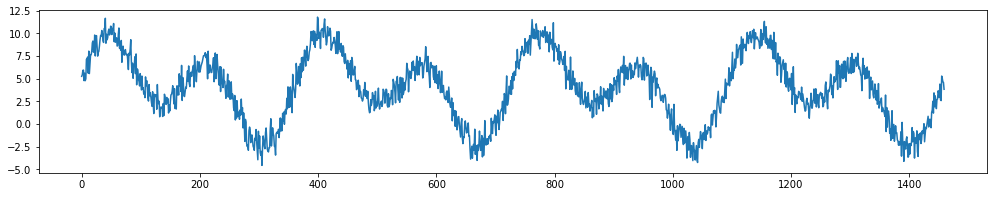

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# generate features
X = pd.DataFrame()
X['day'] = np.arange(4*365)
X['day_of_year'] = 1 + X['day'] % 365

# generate target
signal1 = 4 + 3*np.sin(X['day']/365*2*np.pi)
signal2 = 4 * np.sin(X['day']/365*4*np.pi+365/2)
noise = np.random.normal(0, 0.9, len(X['day']))
y = signal1 + signal2 + noise

# plot
fig = plt.figure(figsize=(17,3))
ax = fig.add_subplot(111)
ax.plot(X['day'],y);

In [9]:
X.head()

,day,day_of_year
0,0,1
1,1,2
2,2,3
3,3,4
4,4,5


In [10]:
y

0       5.265291
1       5.432515
2       5.931035
3       5.955825
4       4.789472
          ...   
1455    5.294825
1456    5.043677
1457    4.655294
1458    4.597418
1459    3.835031
Name: day, Length: 1460, dtype: float64

In [11]:
from preprocessing import RepeatingBasisFunction

In [12]:
N_PERIODS = 5
rbf = RepeatingBasisFunction(n_periods=N_PERIODS,
                             remainder='passthrough',
                             column='day_of_year',
                             input_range=(1,365))
rbf.fit(X)
Xt = rbf.transform(X)

In [14]:
Xt

array([[1.00000000e+00, 3.67879441e-01, 1.83156389e-02, 1.83156389e-02,
        3.67879441e-01, 0.00000000e+00],
       [9.99811333e-01, 3.78054786e-01, 1.93465024e-02, 1.73331619e-02,
        3.57842901e-01, 1.00000000e+00],
       [9.99245545e-01, 3.88364990e-01, 2.04276760e-02, 1.63971974e-02,
        3.47948849e-01, 2.00000000e+00],
       ...,
       [9.99245545e-01, 3.47948849e-01, 1.63971974e-02, 2.04276760e-02,
        3.88364990e-01, 1.45700000e+03],
       [9.99811333e-01, 3.57842901e-01, 1.73331619e-02, 1.93465024e-02,
        3.78054786e-01, 1.45800000e+03],
       [1.00000000e+00, 3.67879441e-01, 1.83156389e-02, 1.83156389e-02,
        3.67879441e-01, 1.45900000e+03]])

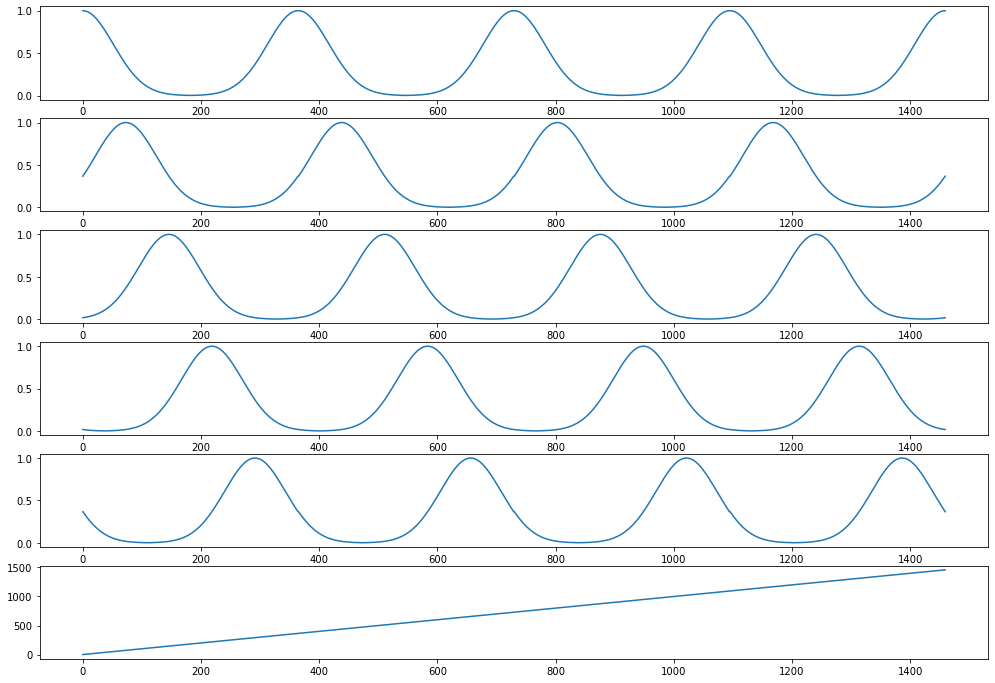

In [13]:
fig, axes = plt.subplots(nrows=Xt.shape[1], figsize=(17,12))
for i in range(Xt.shape[1]):
    axes[i].plot(X['day'], Xt[:,i])
plt.show()

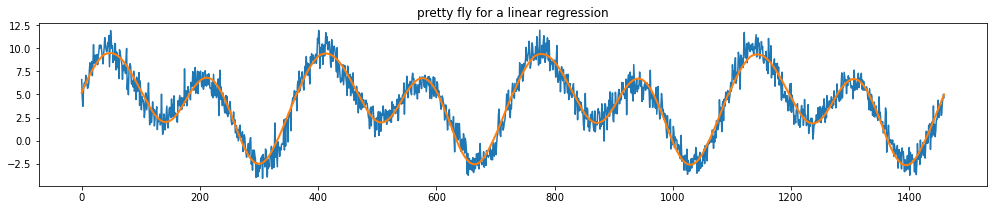

In [5]:
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(17,3))
plt.plot(X['day'], y)
plt.plot(X['day'], LinearRegression().fit(Xt, y).predict(Xt), linewidth=2.0)
plt.title("pretty fly for a linear regression");